<div style="background-color:#1A237E;color:#FFEB3B;padding:20px;border:1px solid #3F51B5;text-align:center;">
<p><font size="14" color=#FFF9C4 face="Lora"><i> Telecom Customer Churn Classification </i></font> </p>
</div>

>### **Problem statement :**

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this project, the goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

> ### **Aim** :

- To classify the potential churn customers based on numerical and categorical features.
- It is a **binary classification** problem for an imbalanced dataset.

In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

sns.set(style = 'white')

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


**Let us read the data file in the python notebook**

In [48]:
telecom_cust = pd.read_csv('D:\Data\churn_dataset.csv',skipinitialspace=True)

In [50]:
telecom_cust.head()
telecom_cust.shape

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


(7043, 21)

In [51]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [52]:
telecom_cust.drop(columns=['customerID'],inplace=True)
telecom_cust

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


**Let's explore the data to see if there are any missing values.**

In [53]:
# Checking the data types of all the columns
telecom_cust.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [54]:
# Converting Total Charges to a numerical data type.
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')
telecom_cust.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

After looking at the above output, we can say that there are 11 missing values for Total Charges. Let us replace remove these 11 rows from our data set

In [55]:
#Removing missing values 
telecom_cust.dropna(inplace = True)
telecom_cust.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [56]:
# check the duplicates
telecom_cust.duplicated().value_counts()

False    7010
True       22
dtype: int64

In [57]:
telecom_cust.drop_duplicates(keep='first', inplace =True)
telecom_cust

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [58]:
telecom_cust.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7010.000000,7010.000000,7010.000000,7010.000000
mean,0.162767,32.520399,64.888666,2290.353388
std,0.369180,24.520441,30.064769,2266.820832
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,408.312500
50%,0.000000,29.000000,70.400000,1403.875000
75%,0.000000,56.000000,89.900000,3807.837500
max,1.000000,72.000000,118.750000,8684.800000


## Data Exploration

Let us first start with exploring our data set, to better understand the patterns in the data and potentially form some hypothesis. First we will look at the distribution of individual variables and then slice and dice our data for any interesting trends.

> ### **Let us first understand the gender, age range, patner and dependent status of the customers**

1.**Gender Distribution** - About half of the customers in our data set are male while the other half are female

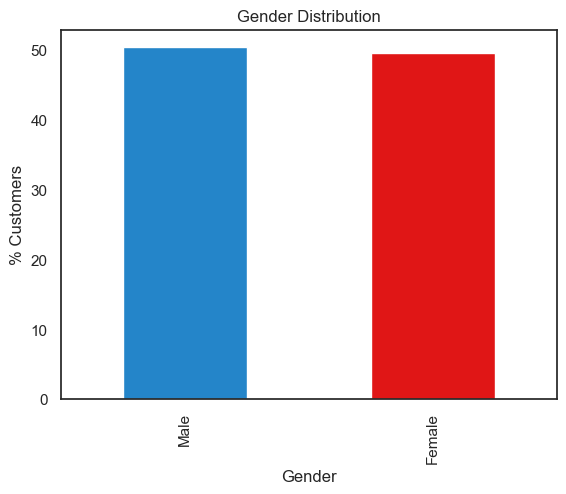

In [60]:
colors = ['#2485c9','#e01616']
ax = (telecom_cust['gender'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar',
                                                                           stacked = True,
                                                                          color = colors)
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution');



**2. Senior Citizens** - There are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.


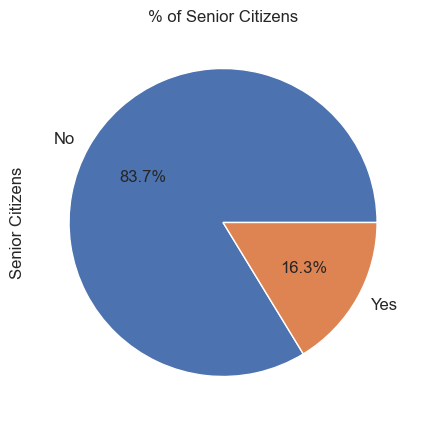

In [61]:
ax = (telecom_cust['SeniorCitizen'].value_counts()*100.0 /len(telecom_cust))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12);

>### **Let u now look at the tenure, contract**

**1. Tenure:**  After looking at the below histogram we can see that a lot of customers have been with the telecom company for just a month, while quite a many are there for about 72 months. This could be potentially because different customers have different contracts. Thus based on the contract they are into it could be more/less easier for the customers to stay/leave the telecom company.

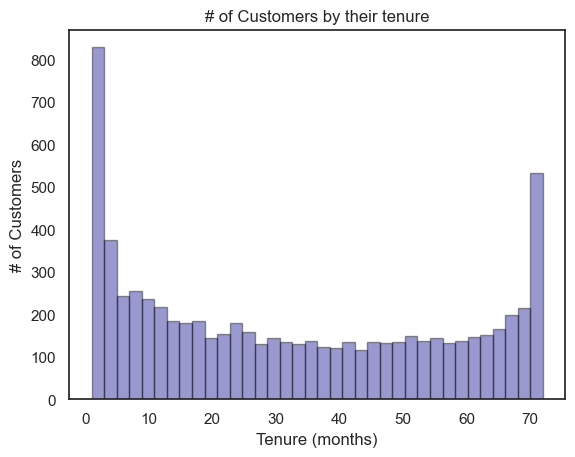

In [62]:
ax = sns.distplot(telecom_cust['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure');

**2. Contracts:** To understand the above graph, lets first look at the # of customers by different contracts. 

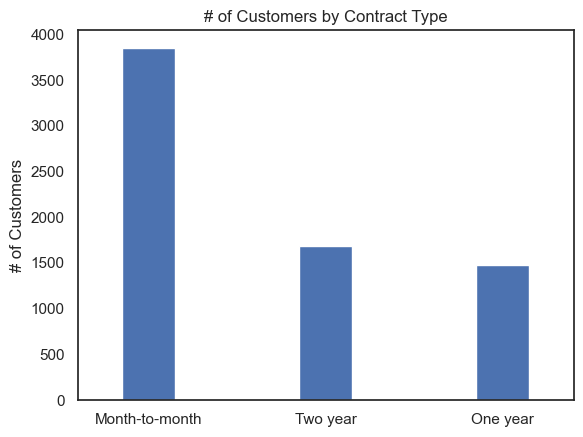

In [63]:
ax = telecom_cust['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type');

As we can see from this graph most of the customers are in the month to month contract. While there are equal number of customers in the 1 year and 2 year contracts.



Below we will understand the tenure of customers based on their contract type.

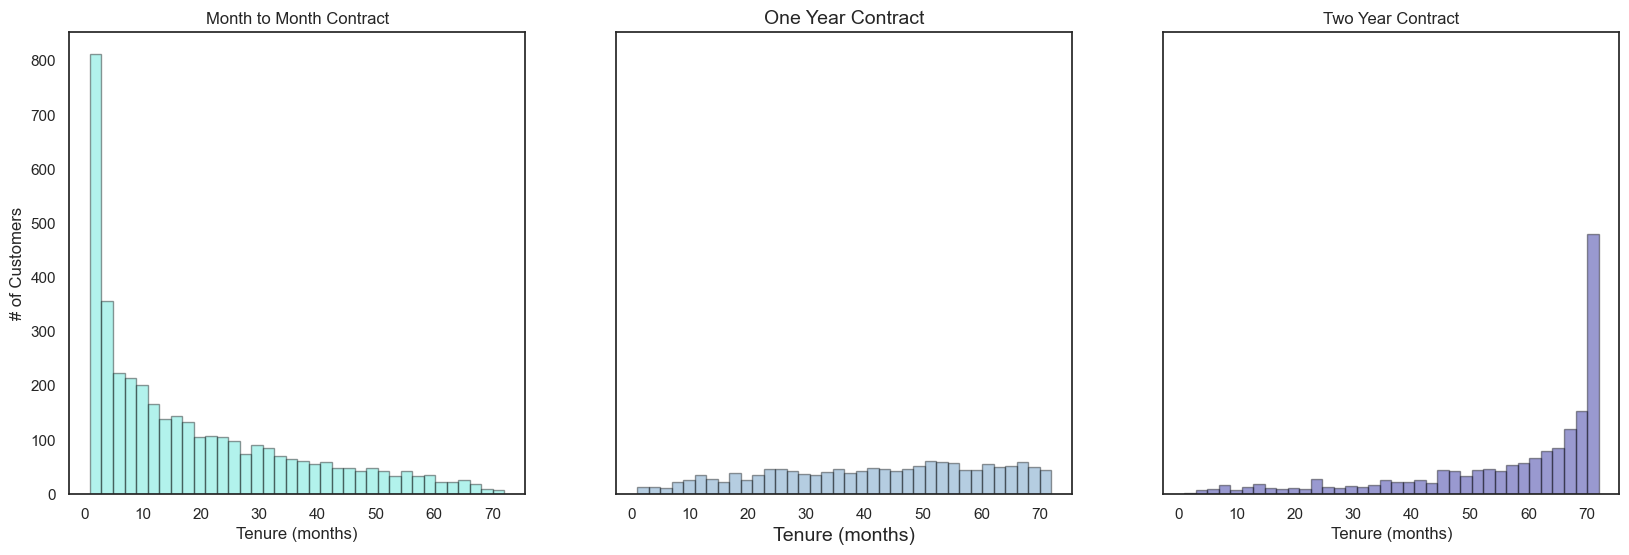

In [64]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract');

Interestingly most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time. 

This is also what we saw in the earlier chart on correlation with the churn rate. 

###  C. Let us now look at the distribution of various services used by customers

In [65]:
telecom_cust.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

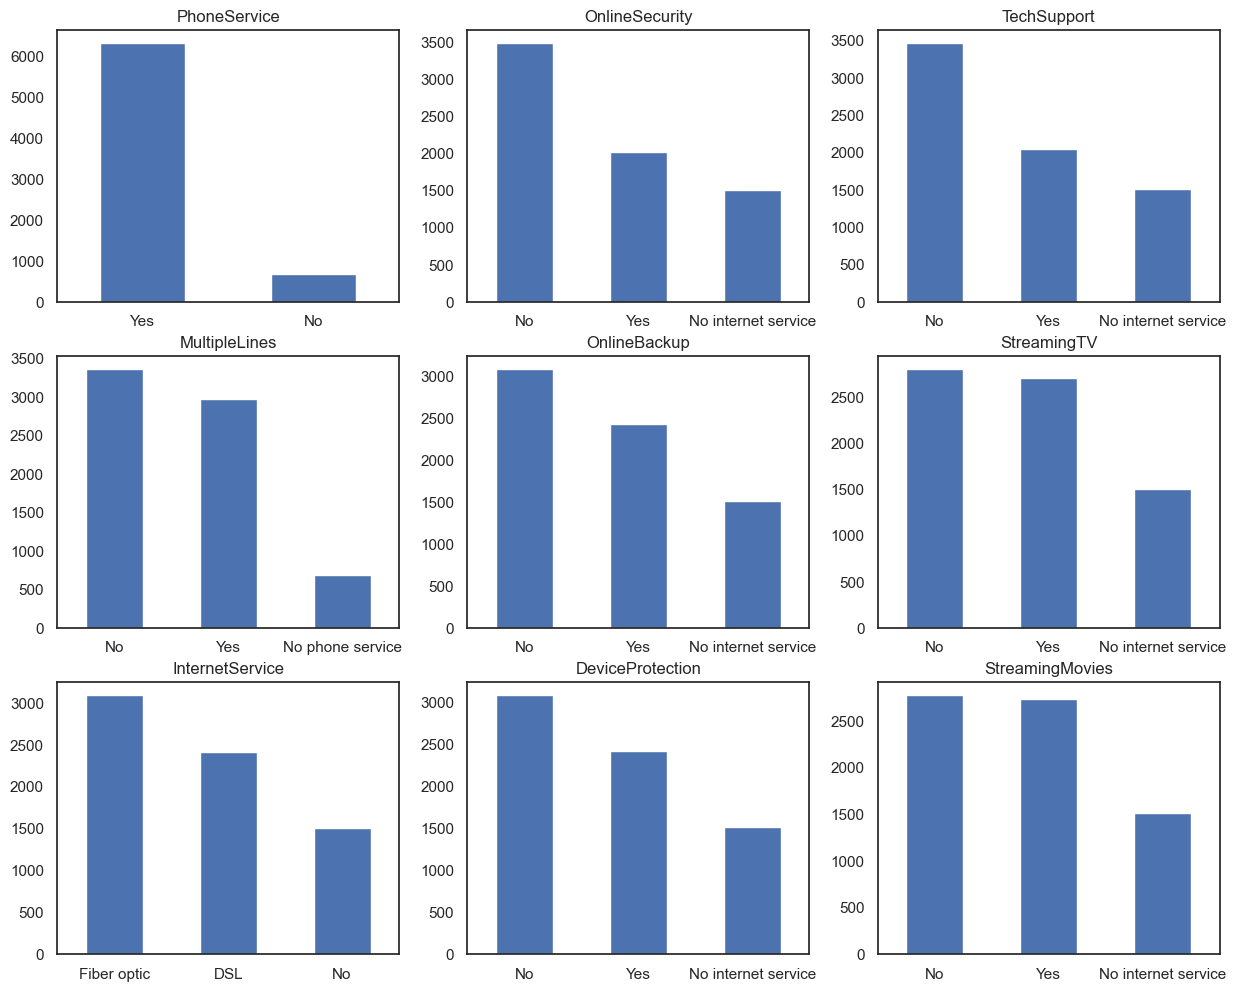

In [66]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)
plt.show();

### D.) Now let's take a quick look at the relation between monthly and total charges

We will observe that the total charges increases as the monthly bill for a customer increases.

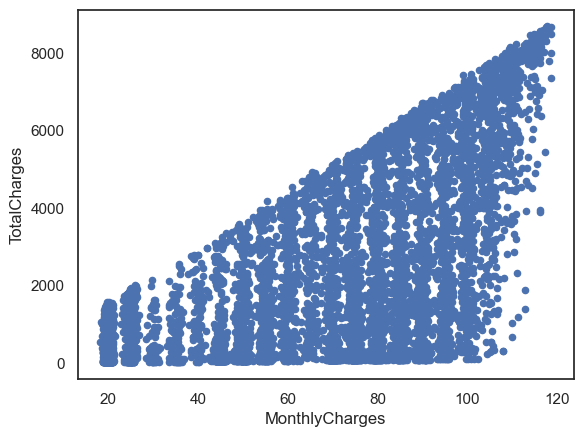

In [67]:
telecom_cust[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges');

### E.) Finally, let's take a look at out predictor variable (Churn) and understand its interaction with other important variables as was found out in the correlation plot. 

Lets now explore the churn rate by tenure, seniority, contract type, monthly charges and total charges to see how it varies by these variables.

**i.) Churn vs Tenure**: As we can see form the below plot, the customers who do not churn, they tend to stay for a longer tenure with the telecom company. 

<Axes: xlabel='Churn', ylabel='tenure'>

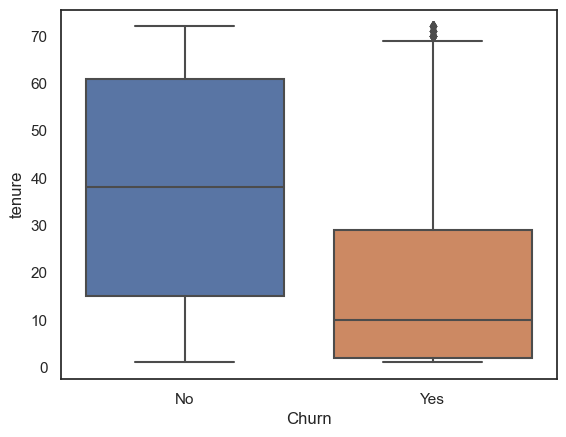

In [17]:
sns.boxplot(x = telecom_cust.Churn, y = telecom_cust.tenure)

**ii.) Churn by Contract Type**: Similar to what we saw in the correlation plot, the customers who have a month to month contract have a very high churn rate.

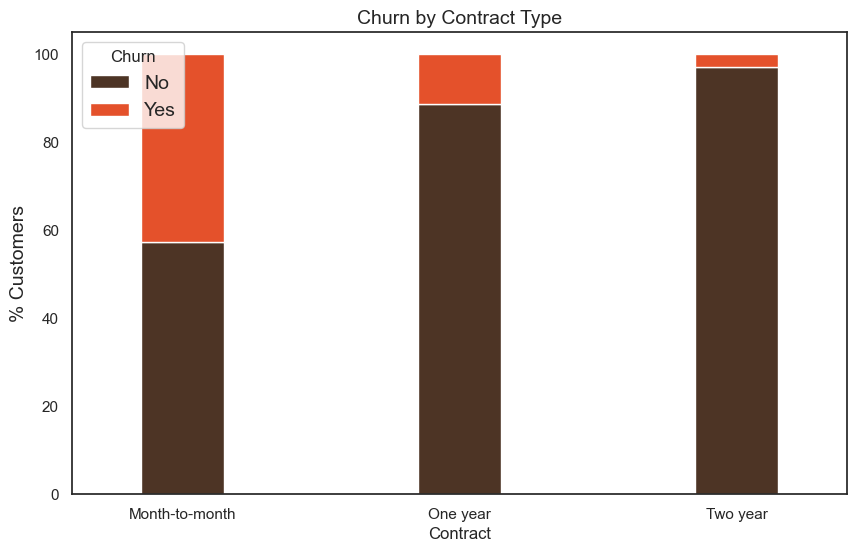

In [20]:
colors = ['#4D3425','#E4512B']
contract_churn = telecom_cust.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)

ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)
plt.show();

**iii.) Churn by Seniority**: Senior Citizens have almost double the churn rate than younger population.

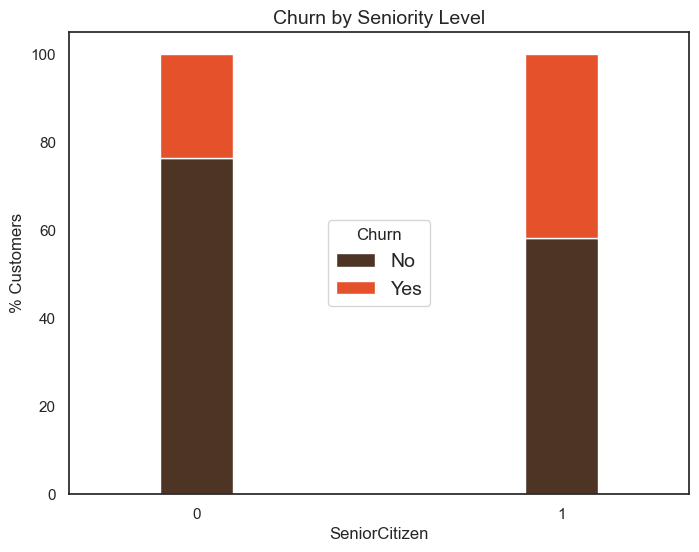

In [22]:
colors = ['#4D3425','#E4512B']
seniority_churn = telecom_cust.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)

ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)
plt.show();

**iv.) Churn by Monthly Charges**: Higher % of customers churn when the monthly charges are high.

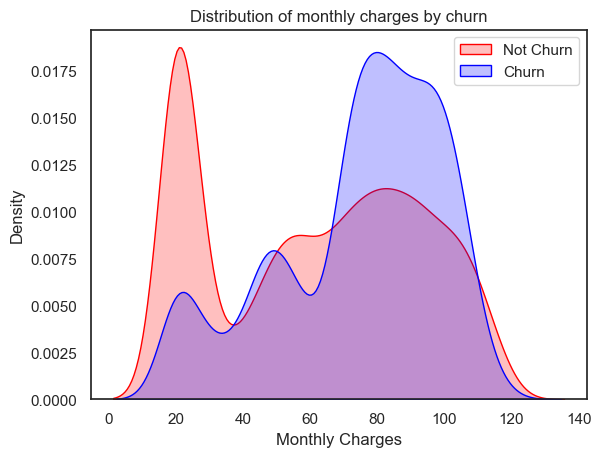

In [24]:
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn');

**v.) Churn by Total Charges**: It seems that there is higer churn when the total charges are lower.

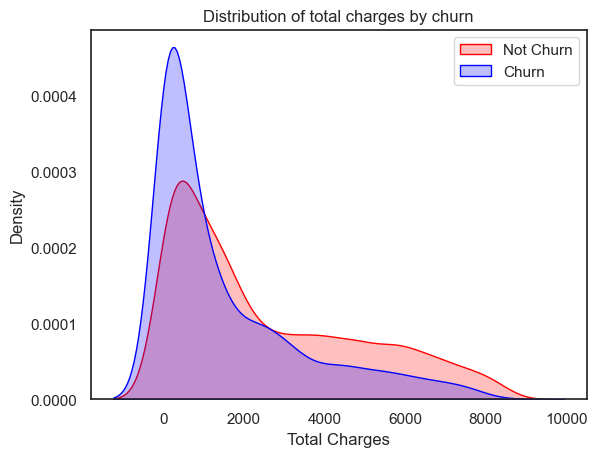

In [25]:
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn');

----


In [28]:
telecom_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### a. Identify the Target Variable and Splitting the Data  into Train and Test

In [31]:
import sklearn 
print(sklearn.__version__)

1.2.1


In [69]:
telecom_cust.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [120]:
y = telecom_cust['Churn']
X = telecom_cust.drop(columns = 'Churn')


In [121]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=123)

In [122]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
655,Male,0,No,No,10,Yes,No,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.10,865.10
1623,Female,0,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45
5302,Female,0,Yes,Yes,10,Yes,No,DSL,No,Yes,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,65.50,616.90
3598,Male,1,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,46.30,46.30
462,Male,0,Yes,Yes,4,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,101.15,385.90


In [123]:
print(X_train.shape, y_test.shape)
print(y_train.shape, y_test.shape)

(5257, 19) (1753,)
(5257,) (1753,)


### b. Separating Categorical and Numerical Columns:

In [124]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
655,Male,0,No,No,10,Yes,No,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.10,865.10
1623,Female,0,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45
5302,Female,0,Yes,Yes,10,Yes,No,DSL,No,Yes,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,65.50,616.90
3598,Male,1,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,46.30,46.30
462,Male,0,Yes,Yes,4,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,101.15,385.90


In [125]:
X_train.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [126]:
X_train_cat = X_train.select_dtypes(include = ['object'])
X_train_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
655,Male,No,No,Yes,No,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic)
1623,Female,No,No,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic)
5302,Female,Yes,Yes,Yes,No,DSL,No,Yes,No,Yes,No,Yes,Month-to-month,Yes,Electronic check
3598,Male,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check
462,Male,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,No,Electronic check


In [127]:
X_train_num = X_train.select_dtypes(include = ['int64','float64'])
X_train_num

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
655,0,10,95.10,865.10
1623,0,54,97.20,5129.45
5302,0,10,65.50,616.90
3598,1,1,46.30,46.30
462,0,4,101.15,385.90
...,...,...,...,...
5238,0,33,53.75,1857.30
4076,0,70,99.35,6944.50
1353,0,66,20.35,1359.50
3468,0,1,19.70,19.70


## c. Scaling the Numerical Features

In [128]:
X_train_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
655,0,10,95.10,865.10
1623,0,54,97.20,5129.45
5302,0,10,65.50,616.90
3598,1,1,46.30,46.30
462,0,4,101.15,385.90


In [129]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num),
                                   columns = X_train_num.columns,
                                   index = X_train_num.index)
X_train_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
655,-0.433306,-0.919631,1.016621,-0.625816
1623,-0.433306,0.872252,1.086434,1.255301
5302,-0.433306,-0.919631,0.032583,-0.735303
3598,2.307837,-1.286152,-0.605712,-0.987010
462,-0.433306,-1.163979,1.217750,-0.837203


In [130]:
X_train_num.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5257.000000,5257.000000,5257.000000,5257.000000
mean,0.158075,32.581701,64.519907,2283.777164
std,0.364846,24.557512,30.083000,2267.140228
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.100000,408.250000
50%,0.000000,29.000000,70.150000,1397.300000
75%,0.000000,56.000000,89.750000,3778.200000
max,1.000000,72.000000,118.750000,8684.800000


In [131]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 4
Mean of each column: [1.58074948e-01 3.25817006e+01 6.45199068e+01 2.28377716e+03]
Std of each column: [3.64811264e-01 2.45551758e+01 3.00801383e+01 2.26692459e+03]


## d. Applying OneHotEncoding on Categorical Columns

In [132]:
X_train_cat['gender'].value_counts(normalize=True)

Female    0.502568
Male      0.497432
Name: gender, dtype: float64

In [133]:
X_train_cat['Partner'].value_counts(normalize=True)

No     0.513601
Yes    0.486399
Name: Partner, dtype: float64

In [134]:
 X_train_cat['Dependents'].value_counts(normalize=True)

No     0.695644
Yes    0.304356
Name: Dependents, dtype: float64

In [135]:
 X_train_cat['PhoneService'].value_counts(normalize=True)

Yes    0.900514
No     0.099486
Name: PhoneService, dtype: float64

In [136]:
X_train_cat['MultipleLines'].value_counts(normalize=True)

No                  0.483356
Yes                 0.417158
No phone service    0.099486
Name: MultipleLines, dtype: float64

In [137]:
X_train_cat['InternetService'].value_counts(normalize=True)

Fiber optic    0.434088
DSL            0.348488
No             0.217424
Name: InternetService, dtype: float64

In [138]:
X_train_cat['OnlineSecurity'].value_counts(normalize=True)

No                     0.493247
Yes                    0.289329
No internet service    0.217424
Name: OnlineSecurity, dtype: float64

In [139]:
X_train_cat['OnlineBackup'].value_counts(normalize=True)

No                     0.438083
Yes                    0.344493
No internet service    0.217424
Name: OnlineBackup, dtype: float64

In [140]:
X_train_cat['DeviceProtection'].value_counts(normalize=True)

No                     0.442458
Yes                    0.340118
No internet service    0.217424
Name: DeviceProtection, dtype: float64

In [141]:
X_train_cat['TechSupport'].value_counts(normalize=True)

No                     0.490204
Yes                    0.292372
No internet service    0.217424
Name: TechSupport, dtype: float64

In [142]:
X_train_cat['StreamingTV'].value_counts(normalize=True)

No                     0.398897
Yes                    0.383679
No internet service    0.217424
Name: StreamingTV, dtype: float64

In [143]:
X_train_cat['StreamingMovies'].value_counts(normalize=True)

No                     0.395663
Yes                    0.386913
No internet service    0.217424
Name: StreamingMovies, dtype: float64

In [144]:
X_train_cat['Contract'].value_counts(normalize=True)

Month-to-month    0.546890
Two year          0.241392
One year          0.211718
Name: Contract, dtype: float64

In [145]:
X_train_cat['PaperlessBilling'].value_counts(normalize=True)

Yes    0.59007
No     0.40993
Name: PaperlessBilling, dtype: float64

In [146]:
X_train_cat['PaymentMethod'].value_counts(normalize=True)

Electronic check             0.336313
Mailed check                 0.231881
Bank transfer (automatic)    0.216663
Credit card (automatic)      0.215142
Name: PaymentMethod, dtype: float64

In [147]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop='first', min_frequency=3000, sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,Dependents_infrequent_sklearn,PhoneService_infrequent_sklearn,PaperlessBilling_infrequent_sklearn
655,0.0,0.0,0.0
1623,0.0,0.0,0.0
5302,1.0,0.0,0.0
3598,0.0,0.0,1.0
462,1.0,0.0,1.0


In [148]:
encoder_.categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'No phone service', 'Yes'], dtype=object),
 array(['DSL', 'Fiber optic', 'No'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Bank transfer (automatic)', 'Credit card (automatic)',
        'Electronic check', 'Mailed check'], dtype=object)]

In [149]:
encoder_.infrequent_categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Yes'], dtype=object),
 array(['No'], dtype=object),
 array(['No', 'No phone service', 'Yes'], dtype=object),
 array(['DSL', 'Fiber optic', 'No'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 array(['No'], dtype=object),
 array(['Bank transfer (automatic)', 'Credit card (automatic)',
        'Electronic check', 'Mailed check'], dtype=object)]

In [150]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
655,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1623,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
5302,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3598,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
462,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Concatinating the Encoded Categorical Features and Rescaled Numerical Features:

In [151]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_ohe], axis=1)

X_train_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
655,-0.433306,-0.919631,1.016621,-0.625816,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1623,-0.433306,0.872252,1.086434,1.255301,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
5302,-0.433306,-0.919631,0.032583,-0.735303,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3598,2.307837,-1.286152,-0.605712,-0.987010,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
462,-0.433306,-1.163979,1.217750,-0.837203,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Preparing Test Data

In [152]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5212,Male,0,Yes,Yes,72,No,No phone service,DSL,Yes,Yes,Yes,No,No,No,Two year,No,Credit card (automatic),38.50,2763.00
3209,Female,0,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,93.85,93.85
2509,Female,0,Yes,No,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),25.25,1841.20
1868,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.05,44.05
5687,Male,0,No,No,43,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,No,No,One year,Yes,Credit card (automatic),90.65,3882.30


In [153]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1753 entries, 5212 to 398
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1753 non-null   object 
 1   SeniorCitizen     1753 non-null   int64  
 2   Partner           1753 non-null   object 
 3   Dependents        1753 non-null   object 
 4   tenure            1753 non-null   int64  
 5   PhoneService      1753 non-null   object 
 6   MultipleLines     1753 non-null   object 
 7   InternetService   1753 non-null   object 
 8   OnlineSecurity    1753 non-null   object 
 9   OnlineBackup      1753 non-null   object 
 10  DeviceProtection  1753 non-null   object 
 11  TechSupport       1753 non-null   object 
 12  StreamingTV       1753 non-null   object 
 13  StreamingMovies   1753 non-null   object 
 14  Contract          1753 non-null   object 
 15  PaperlessBilling  1753 non-null   object 
 16  PaymentMethod     1753 non-null   object

In [154]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
5212,Male,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,No,No,No,Two year,No,Credit card (automatic)
3209,Female,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check
2509,Female,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic)
1868,Male,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic)
5687,Male,No,No,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,No,No,One year,Yes,Credit card (automatic)


In [155]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5212,0,72,38.50,2763.00
3209,0,1,93.85,93.85
2509,0,72,25.25,1841.20
1868,0,1,44.05,44.05
5687,0,43,90.65,3882.30


In [156]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5212,-0.433306,1.605295,-0.865020,0.211398
3209,-0.433306,-1.286152,0.975065,-0.966034
2509,-0.433306,1.605295,-1.305510,-0.195232
1868,-0.433306,-1.286152,-0.680512,-0.988003
5687,-0.433306,0.424281,0.868683,0.705150


In [157]:
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat), 
                               columns=encoder.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)
X_test_cat_ohe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5212,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3209,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2509,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1868,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5687,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [158]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_ohe], axis=1)

X_test_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5212,-0.433306,1.605295,-0.865020,0.211398,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3209,-0.433306,-1.286152,0.975065,-0.966034,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2509,-0.433306,1.605295,-1.305510,-0.195232,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1868,-0.433306,-1.286152,-0.680512,-0.988003,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5687,-0.433306,0.424281,0.868683,0.705150,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


## Logistic Regression

In [159]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_transformed,y_train)

LogisticRegression()

## Prediction

In [160]:
# Prediction

y_test_pred = classifier.predict(X_test_transformed)


In [161]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
5212,No,No
3209,Yes,Yes
2509,No,No
1868,No,No
5687,No,No


## Evaluation

In [162]:
# calculate the accuracy of class predictions

from sklearn import metrics
# from sklearn.metrics import accuracy_score

Accuracy_LR = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy: ',Accuracy_LR )

Accuracy:  0.8077581289218483


## Training - Support Vector Classifier

In [163]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

Accuracy_SVC = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy: ',Accuracy_SVC )

SVC()

Accuracy:  0.8003422703936109


In [164]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
5212,No,No
3209,Yes,Yes
2509,No,No
1868,No,No
5687,No,No


## Training - KNN Classifier

In [165]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed, y_train)

#y_test_pred = classifier.predict(X_test_transformed)

#metrics.accuracy_score(y_test, y_test_pred)

KNeighborsClassifier()

In [166]:
y_test_pred = classifier.predict(X_test_transformed)

Accuracy_KNN =  metrics.accuracy_score(y_test, y_test_pred)
Accuracy_KNN

0.7604107244723332

In [167]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
5212,No,No
3209,Yes,Yes
2509,No,No
1868,No,No
5687,No,No


## Training - DT Classifier

In [168]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

Accuracy_DTC = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy: ',Accuracy_DTC )

DecisionTreeClassifier()

Accuracy:  0.7062179121505989


In [169]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
5212,No,No
3209,Yes,Yes
2509,No,No
1868,No,Yes
5687,No,No


## Training - Random Forest Classifier

In [170]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

Accuracy_RFC = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy: ',Accuracy_RFC )

RandomForestClassifier()

Accuracy:  0.7940673131774102


In [171]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
5212,No,No
3209,Yes,Yes
2509,No,No
1868,No,Yes
5687,No,No


## Boosting: Gradient Boosted Decision Tree

In [172]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

Accuracy_GBDT = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy: ',Accuracy_GBDT )

GradientBoostingClassifier()

Accuracy:  0.8031945236737023


In [173]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
5212,No,No
3209,Yes,Yes
2509,No,No
1868,No,Yes
5687,No,No


## Boosting: ADA Boosting

In [174]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

Accuracy_ADAB = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy: ',Accuracy_ADAB )

AdaBoostClassifier()

Accuracy:  0.8077581289218483


In [175]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
5212,No,No
3209,Yes,Yes
2509,No,No
1868,No,Yes
5687,No,No


In [178]:
df_data = [['Logistic Classifier', Accuracy_LR ],
           ['k-nearest neighbors Classifier',Accuracy_KNN],
           ['Decision Tree Classifier',Accuracy_DTC],
           ['Support Vector Classifier',Accuracy_SVC],
           ['Random Forest Classifier ',Accuracy_RFC ],
           ['Gradient Boosting Decision Tree Clasifier',Accuracy_],
           ['Adaptive Boosting Clasifier',Accuracy_ADAB ]]

data = pd.DataFrame(df_data, columns = ['Algorithm','Accuracy'])

# Obervation

In [179]:
data

,Algorithm,Accuracy
0,Logistic Classifier,0.807758
1,k-nearest neighbors Classifier,0.760411
2,Decision Tree Classifier,0.706218
3,Support Vector Classifier,0.800342
4,Random Forest Classifier,0.794067
5,Gradient Boosting Decision Tree Clasifier,0.803195
6,Adaptive Boosting Clasifier,0.807758


# Conclusion
- The results from **Gradient Boosting Decision Tree Clasifier** are similar to that of the **logistic regression**.
-  **Gradient Boosting Decision Tree Clasifier** and **logistic regression** algorithms are best models for churn prediction with the accuracy 80.77%.